<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


/home/deekshant_khitoliya/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
#https://github.com/jupyter/help/issues/229
#unzipping file in ipython
from shutil import unpack_archive
unpack_archive('training_text.zip', '/home/deekshant_khitoliya/Untitled Folder/Cancer')

In [4]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [5]:
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        data_text[column][index] = total_text

In [6]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 23.400638999999998 seconds


In [7]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate a varie...
1,1,CBL,W802*,2,abstract background non small cell lung cance...
2,2,CBL,Q249E,2,abstract background non small cell lung cance...
3,3,CBL,N454D,3,recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,oncogenic mutations in the monomeric casitas b...


In [8]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [9]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [10]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [11]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [12]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


In [13]:
X_train.head(4)

,ID,Gene,Variation,Class,TEXT
36,36,DICER1,G1809K,4,abstract dicer1 plays a critical role in micr...
1462,1462,FGFR2,R203C,7,it is known that fgfr2 gene variations confer ...
583,583,SMAD4,R361C,4,the smad4 dpc4 tumour suppressor1 is inactivat...
2846,2846,BRCA2,R2336H,4,mutation screening of the breast and ovarian c...


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [14]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4832064268550784
Log loss on Test Data using Random Model 2.494082890688475
-------------------- Confusion matrix --------------------


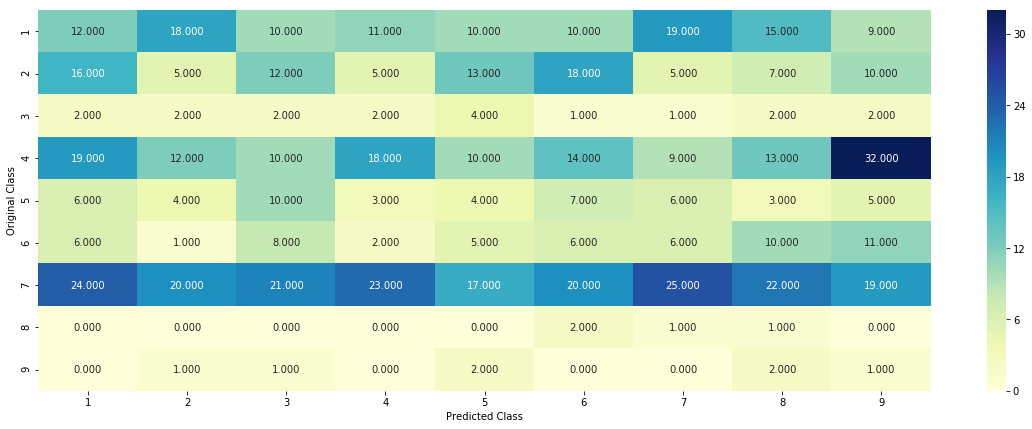

-------------------- Precision matrix (Columm Sum=1) --------------------


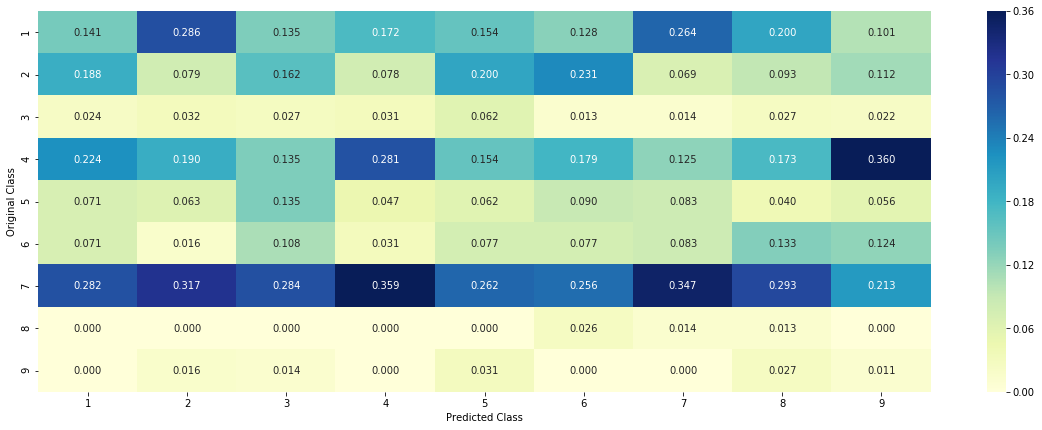

-------------------- Recall matrix (Row sum=1) --------------------


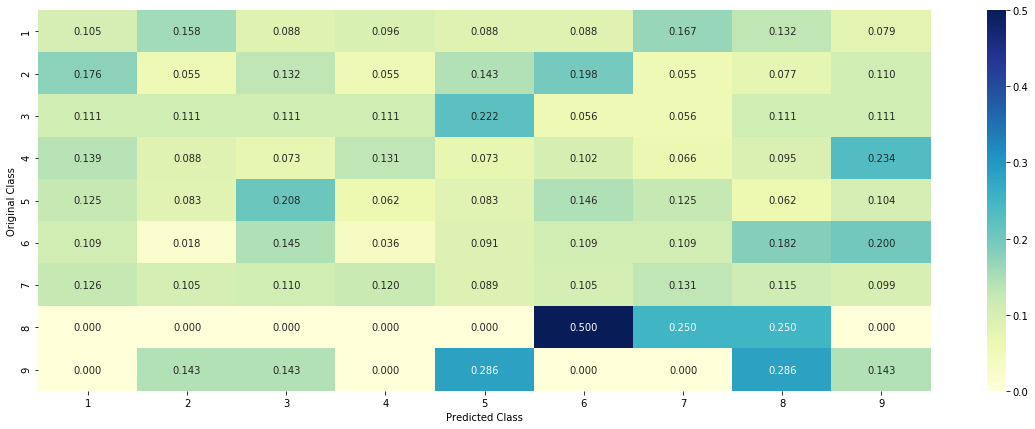

In [15]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

## 4 Make Data Model Ready: encoding numerical, categorical features

### 4.1 Vectorizing Categorical features

#### 4.1.1 GENE

<p style="font-size:18px;"> <b>Q.</b>  featurize Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [151]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])

gene_features = gene_vectorizer.get_feature_names()
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])


In [17]:
train_df['Gene'].head()

2773      BRAF
1741      MSH2
913     PDGFRA
349       CDH1
81       CCND3
Name: Gene, dtype: object

In [144]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 234)


#### 4.1.2 GENE

<p style="font-size:18px;"> <b>Q.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [150]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
variation_features = variation_vectorizer.get_feature_names()

test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])



In [141]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1957)


### 4.2 Generating Text based features

In [21]:
#Extractinf Text AND id column
training_df= train_df[['ID','TEXT']]
testing_df= test_df[['ID','TEXT']]
cv_data_df= cv_df[['ID','TEXT']]

In [22]:
training_df.head(3)

,ID,TEXT
2773,2773,recently mutations in the b raf gene have been...
1741,1741,identification of a high risk disease causing ...
913,913,activating mutations in the platelet derived g...


In [23]:
#The punctuations have been removed from the string. Lets write a similar function for removing stopwords.

#NLTK stopwords is not quite enough, so we had to update it. 
#I suggest to use 'sklearn.feature_extraction.stop_words' or 'spacy.en.language_data' as these have data twice of stopwords.
from sklearn.feature_extraction import text 
stop_words = set(text.ENGLISH_STOP_WORDS)


def remove_stopwords_from_string(total_text):
    
    
    string = ""
    for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
    return string
     

In [24]:
#Lets take backup of un-processed text, we might need it for future functions.
#We will perform all actions on testing_df aswell to avoid any errors in future.
training_df["text_backup"] = training_df["TEXT"] #Creating new column text_backup same as text.
testing_df["text_backup"] = testing_df["TEXT"] #Creating new column text_backup same as text.
cv_data_df["text_backup"] = cv_data_df['TEXT']

In [28]:
##Applying above made functions on text.
training_df["text"] = training_df["TEXT"].apply(lambda x:remove_stopwords_from_string(x))
testing_df["text"] = testing_df["TEXT"].apply(lambda x:remove_stopwords_from_string(x))
cv_data_df["text"] = cv_data_df["TEXT"].apply(lambda x:remove_stopwords_from_string(x))

training_df.drop('TEXT', axis=1, inplace=True)
testing_df.drop('TEXT', axis=1, inplace=True)
cv_data_df.drop('TEXT', axis=1, inplace=True)
training_df.head(5)

,ID,text_backup,text
2773,2773,recently mutations in the b raf gene have been...,recently mutations b raf gene identified varie...
1741,1741,identification of a high risk disease causing ...,identification high risk disease causing const...
913,913,activating mutations in the platelet derived g...,activating mutations platelet derived growth f...
349,349,stomach cancer ranks as the third most importa...,stomach cancer ranks important cause global ca...
81,81,of the generalizations to emerge from studies ...,generalizations emerge studies protein secreti...


#### 4.2.1 Feature 1-> Word Count in the Complete text - total number of words in the complete  text

In [30]:
##No Length of the input OR count of the words in the statement(Vocab size).
training_df['word_count']= training_df["text_backup"].apply(lambda x: len(str(x).split()))
testing_df['word_count']= testing_df["text_backup"].apply(lambda x: len(str(x).split()))
cv_data_df['word_count']= cv_data_df["text_backup"].apply(lambda x: len(str(x).split()))

#### 4.2.2 Feature 2-> Character Count in the Complete text - total number of characters in complete  text

In [31]:
#Feature 2 - Count of characters in a statement
training_df['char_count'] = training_df["text_backup"].apply(lambda x: len(str(x)))
testing_df['char_count'] = testing_df["text_backup"].apply(lambda x: len(str(x)))
cv_data_df['char_count'] = cv_data_df["text_backup"].apply(lambda x: len(str(x)))


#### 4.2.3 Feature 3-> Word Density of the Complete text - average length of the words used in the text

In [62]:
#Feature 3-Diversity_score i.e. Average length of words used in statement
training_df['Diversity_score'] = training_df['char_count'] / training_df['word_count']
#X_test = X_test.fillna(X_train.mean())
training_df['Diversity_score']= training_df['Diversity_score'].fillna(training_df['Diversity_score'].mean())


testing_df['Diversity_score'] = testing_df['char_count'] / testing_df['word_count']
testing_df['Diversity_score']= testing_df['Diversity_score'].fillna(testing_df['Diversity_score'].mean())

cv_data_df['Diversity_score'] = cv_data_df['char_count'] / cv_data_df['word_count']
cv_data_df['Diversity_score']= cv_data_df['Diversity_score'].fillna(cv_data_df['Diversity_score'].mean())

training_df.head(5)

,ID,text_backup,text,word_count,char_count,Diversity_score,stopword_count,Top_50_words,least_50_words
2773,2773,recently mutations in the b raf gene have been...,recently mutations b raf gene identified varie...,18251,107236,5.875623,5857,2383,0
1741,1741,identification of a high risk disease causing ...,identification high risk disease causing const...,5755,39137,6.800521,1961,495,0
913,913,activating mutations in the platelet derived g...,activating mutations platelet derived growth f...,5706,35990,6.307396,1972,541,0
349,349,stomach cancer ranks as the third most importa...,stomach cancer ranks important cause global ca...,7660,44491,5.808225,2458,633,0
81,81,of the generalizations to emerge from studies ...,generalizations emerge studies protein secreti...,12850,75903,5.906848,3793,1113,0


#### 4.2.4 Feature 4->Stopword Count in the Complete text - total number of stopwords in the text

In [33]:
#The usage of stop words can be another writing pattern. So the fourth feature is count of stopwords.
#Feature_4 = Count of stopwords in the sentence.
stop_words = set(stopwords.words('english'))
training_df['stopword_count'] = training_df["text_backup"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]) )
testing_df['stopword_count'] = testing_df["text_backup"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]) )
cv_data_df['stopword_count'] = cv_data_df["text_backup"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]) )

#### 4.2.5 Feature 5->Let us identify the highest used words(other than stopwords) in our input data for further feature generation.

In [34]:
#vec = CountVectorizer().fit(corpus)
#Here we get a Bag of Word model that has cleaned the text, removing non-aphanumeric characters and stop words.
#bag_of_words = vec.transform(corpus)
#bag_of_words a matrix where each row represents a specific text in corpus and each column represents a word in vocabulary, that is, all words found in corpus. Note that bag_of_words[i,j] is the occurrence of word j in the text i.
#sum_words = bag_of_words.sum(axis=0)
#sum_words is a vector that contains the sum of each word occurrence in all texts in the corpus. In other words, we are adding the elements for each column of bag_of_words matrix.
#words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#Finally we sort a list of tuples that contain the word and their occurrence in the corpus.





def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
     
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [36]:
#Now I want to get the top 50 common words:
top_50=[]
common_words = get_top_n_words(training_df["text"], 50)
for word, freq in common_words:
    top_50.append(word)

In [37]:
#Feature-5: The count of top used words.
training_df['Top_50_words'] = training_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in top_50]) )
testing_df['Top_50_words'] = testing_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in top_50]) )
cv_data_df['Top_50_words'] = cv_data_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in top_50]) )

#### 4.2.6 Feature 6-> Let us identify the Least used words(other than stopwords) in our input data for further feature generation.

In [38]:
##Similarly lets identify the least used words:
def get_least_n_words(corpus, n=None):
    
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
     
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

#Now I want to get the Least 50 common words:
least_50=[]
common_words = get_least_n_words(training_df["text"], 20)
for word, freq in common_words:
    least_50.append(word)


In [39]:
##Feature-6: The count of least used words.
training_df['least_50_words'] = training_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in least_50]) )
testing_df['least_50_words'] = testing_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in least_50]) )
cv_data_df['least_50_words'] = cv_data_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in least_50]) )

#### Text contains reference of particular gene and variatio. To check this, we will create features for gene  and variation names used. For this we need gene  and variation corpus, but I did not find any readily available corpus.

### 4.3 Vectorizing TEXT

### 4.3.1 Method 1

In [109]:
#So I created a list 
#Lets join the list of Genes+Variation and see what happens

# Collecting all the genes and variations data into a single list
gene_variation = []
for gene in data['Gene'].values:
    gene_variation.append(gene)
for variation in data['Variation'].values:
    gene_variation.append(variation)

In [110]:
print("Total number of unique words in corpus :", len(gene_variation))

Total number of unique words in corpus : 6642


In [122]:
tfidfVectorizer = TfidfVectorizer()
text2 = tfidfVectorizer.fit(gene_variation)
gene_variation_features = tfidfVectorizer.get_feature_names()
train_text = tfidfVectorizer.transform(train_df['TEXT'])
test_text = tfidfVectorizer.transform(test_df['TEXT'])
cv_text = tfidfVectorizer.transform(cv_df['TEXT'])

In [121]:
train_text.shape

(2124, 3238)

#### Let us apply TFIDF vectorization on our Text data and instead of selecting all the words let's select top 5000 words based on  tf-idf values

### 4.3.2 Method 2

In [74]:
tv = TfidfVectorizer(min_df=3)
tv_matrix = tv.fit_transform(train_df['TEXT'])
tvf_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
feature_array = np.array(vocab)
#Populate a Pandas SparseDataFrame from a SciPy Sparse Matrix
tfidf_df = pd.DataFrame(np.round(tvf_matrix, 2), columns=vocab)



print("Total number of unique words in train data :", len(vocab))

Total number of unique words in train data : 53484


In [75]:
#https://stackoverflow.com/questions/56707363/how-to-get-top-n-terms-with-highest-tf-idf-score-big-sparse-matrix?noredirect=1&lq=1&lq=1
# Replace this with the number of top words you want to get in each row
top_n_words = 10000

#Sorting  in descending order and selecting top 1000 features names

feature_imp_dict = sorted(list(zip(tv.get_feature_names(),tv_matrix.sum(0).getA1())),key=lambda x: x[1], reverse=True)[:top_n_words]

In [76]:
#Get top n key's with Value as dictionary
#return  keys as a list in Python
important_feature=[]
for key,v in feature_imp_dict:
     important_feature.append(key)

#Selecting multiple columns in a pandas dataframe
tfidf_df_imp=tfidf_df.loc[:, important_feature]
tfidf_df_imp.shape

(2124, 10000)

In [77]:
import scipy
# X_train.head()
print("train Shape Before -> ",tfidf_df_imp.shape," Type",type(tfidf_df_imp))

#so we need to convert our feature data into sparse matrix so that we will combine our feature and and tfidf vec 
train_feat_sparse = scipy.sparse.csr_matrix(tfidf_df_imp)

print("train Shape After-> ",train_feat_sparse.shape," Type",type(train_feat_sparse))

train Shape Before ->  (2124, 10000)  Type <class 'pandas.core.frame.DataFrame'>
train Shape After->  (2124, 10000)  Type <class 'scipy.sparse.csr.csr_matrix'>


#### TEST

In [78]:
# we use the same vectorizer that was trained on train data
tv_test_matrix = tv.transform(test_df['TEXT'])
tvf_test_matrix = tv_test_matrix.toarray()
tfidf_test_df = pd.DataFrame(np.round(tvf_test_matrix, 2), columns=vocab)


tfidf_df_imp_test=tfidf_test_df.loc[:, important_feature]

In [79]:
import scipy

print("test Shape Before -> ",tfidf_df_imp_test.shape," Type",type(tfidf_df_imp_test))

#so we need to convert our feature data into sparse matrix so that we will combine our feature and and tfidf vec 
test_feat_sparse = scipy.sparse.csr_matrix(tfidf_df_imp_test)

print("test Shape After-> ",test_feat_sparse.shape," Type",type(test_feat_sparse))

test Shape Before ->  (665, 10000)  Type <class 'pandas.core.frame.DataFrame'>
test Shape After->  (665, 10000)  Type <class 'scipy.sparse.csr.csr_matrix'>


#### CV data

In [80]:
## we use the same vectorizer that was trained on train data
tv_cv_matrix = tv.transform(cv_df['TEXT'])
tvf_cv_matrix = tv_cv_matrix.toarray()
tfidf_cv_df = pd.DataFrame(np.round(tvf_cv_matrix, 2), columns=vocab)


tfidf_df_imp_cv=tfidf_cv_df.loc[:, important_feature]

In [81]:
print("cv Shape Before -> ",tfidf_df_imp_cv.shape," Type",type(tfidf_df_imp_cv))

#so we need to convert our feature data into sparse matrix so that we will combine our feature and and tfidf vec 
cv_feat_sparse = scipy.sparse.csr_matrix(tfidf_df_imp_cv)

print("cv Shape After-> ",cv_feat_sparse.shape," Type",type(cv_feat_sparse))

cv Shape Before ->  (532, 10000)  Type <class 'pandas.core.frame.DataFrame'>
cv Shape After->  (532, 10000)  Type <class 'scipy.sparse.csr.csr_matrix'>


In [113]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_feat_sparse, axis=0)

# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_feat_sparse, axis=0)

# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_feat_sparse, axis=0)


In [123]:
#don't forget to normalize every feature
train_text_onehotCoding = normalize(train_text, axis=0)

test_text_onehotCoding = normalize(test_text, axis=0)

cv_text_onehotCoding = normalize(cv_text, axis=0)

In [124]:
'word_count'
word_count_standardized_train_data = normalize(training_df['word_count'].values.reshape(-1,1))
word_count_standardized_test_data = normalize(testing_df['word_count'].values.reshape(-1,1))
word_count_standardized_cv_data = normalize(cv_data_df['word_count'].values.reshape(-1,1))

'char_count'
char_count_standardized_train_data = normalize(training_df['char_count'].values.reshape(-1,1))
char_count_standardized_test_data = normalize(testing_df['char_count'].values.reshape(-1,1))
char_count_standardized_cv_data = normalize(cv_data_df['char_count'].values.reshape(-1,1))


'Diversity_score'

Word_Density_standardized_train_data = normalize(training_df['Diversity_score'].values.reshape(-1,1))
Word_Density_standardized_test_data = normalize(testing_df['Diversity_score'].values.reshape(-1,1))
Word_Density_standardized_cv_data = normalize(cv_data_df['Diversity_score'].values.reshape(-1,1))

'stopword_count'

stopword_count_standardized_train_data = normalize(training_df['stopword_count'].values.reshape(-1,1))
stopword_count_standardized_test_data = normalize(testing_df['stopword_count'].values.reshape(-1,1))
stopword_count_standardized_cv_data = normalize(cv_data_df['stopword_count'].values.reshape(-1,1))

'Top_50_words'

topword_count_standardized_train_data = normalize(training_df['Top_50_words'].values.reshape(-1,1))
topword_count_standardized_test_data = normalize(testing_df['Top_50_words'].values.reshape(-1,1))
topword_count_standardized_cv_data = normalize(cv_data_df['Top_50_words'].values.reshape(-1,1))

'least_50_words'

leastword_count_standardized_train_data = normalize(training_df['least_50_words'].values.reshape(-1,1))
leastword_count_standardized_test_data = normalize(testing_df['least_50_words'].values.reshape(-1,1))
leastword_count_standardized_cv_data = normalize(cv_data_df['least_50_words'].values.reshape(-1,1))


### Stack above three features

In [125]:
train_x_onehotCoding = hstack((word_count_standardized_train_data,char_count_standardized_train_data,Word_Density_standardized_train_data,
stopword_count_standardized_train_data,topword_count_standardized_train_data,leastword_count_standardized_train_data,
 train_gene_feature_onehotCoding,train_variation_feature_onehotCoding,train_text_onehotCoding,train_text_feature_onehotCoding
 )).tocsr()
train_y = np.array(list(train_df['Class']))

In [126]:
test_x_onehotCoding = hstack((word_count_standardized_test_data,
char_count_standardized_test_data,
Word_Density_standardized_test_data,
stopword_count_standardized_test_data, 
topword_count_standardized_test_data,
leastword_count_standardized_test_data,
test_gene_feature_onehotCoding, test_variation_feature_onehotCoding, test_text_onehotCoding,test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

In [127]:
cv_x_onehotCoding = hstack((word_count_standardized_cv_data,
char_count_standardized_cv_data,
Word_Density_standardized_cv_data,
stopword_count_standardized_cv_data,
topword_count_standardized_cv_data,
leastword_count_standardized_cv_data,
cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding, cv_text_onehotCoding,cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [128]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 15435)
(number of data points * number of features) in test data =  (665, 15435)
(number of data points * number of features) in cross validation data = (532, 15435)


<h1>5. Machine Learning Models</h1>

In [71]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [70]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

### 5.1 Logistic Regression with Class Balancing

#### 5.1.1 Hyper Parameter Tuning

for alpha = 1e-06
Log Loss : 1.0076785226096334
for alpha = 1e-05
Log Loss : 1.0152776195832298
for alpha = 0.0001
Log Loss : 0.9448576828315169
for alpha = 0.001
Log Loss : 0.9181683245549324
for alpha = 0.01
Log Loss : 0.9692794028153214
for alpha = 0.1
Log Loss : 1.0572976798829217
for alpha = 1
Log Loss : 1.3154673944954784
for alpha = 10
Log Loss : 1.535880306180472
for alpha = 100
Log Loss : 1.5863239822643598


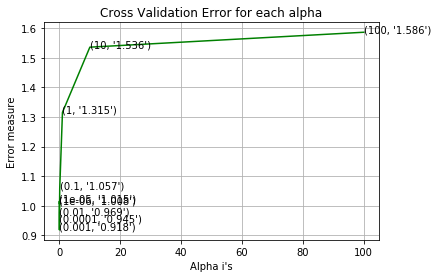

For values of best alpha =  0.001 The train log loss is: 0.529202665893712
For values of best alpha =  0.001 The cross validation log loss is: 0.9181683245549324
For values of best alpha =  0.001 The test log loss is: 0.9265658583519459


In [129]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification


alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### 5.1.2  Testing the model with best hyper paramters

Log loss : 0.9181683245549324
Number of mis-classified points : 0.33646616541353386
-------------------- Confusion matrix --------------------


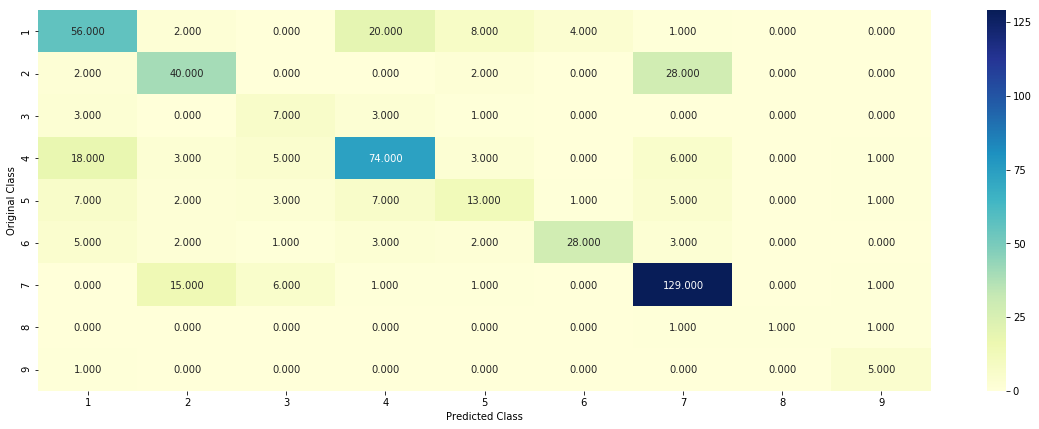

-------------------- Precision matrix (Columm Sum=1) --------------------


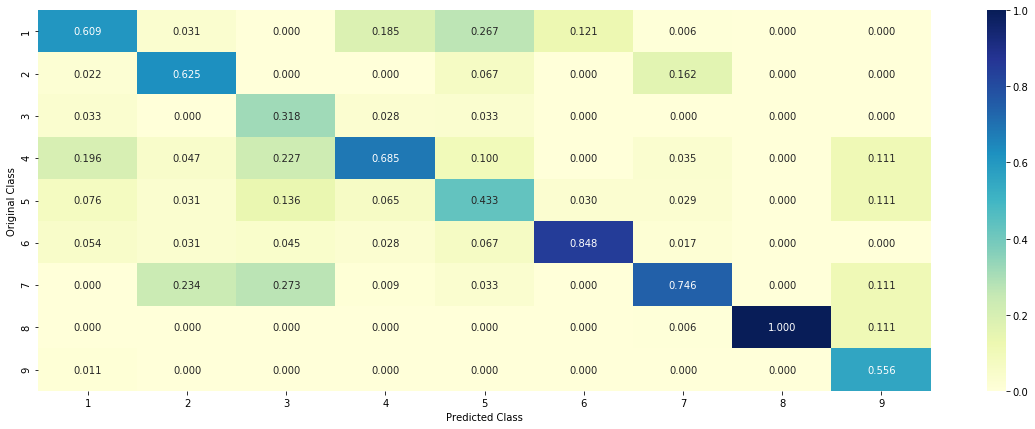

-------------------- Recall matrix (Row sum=1) --------------------


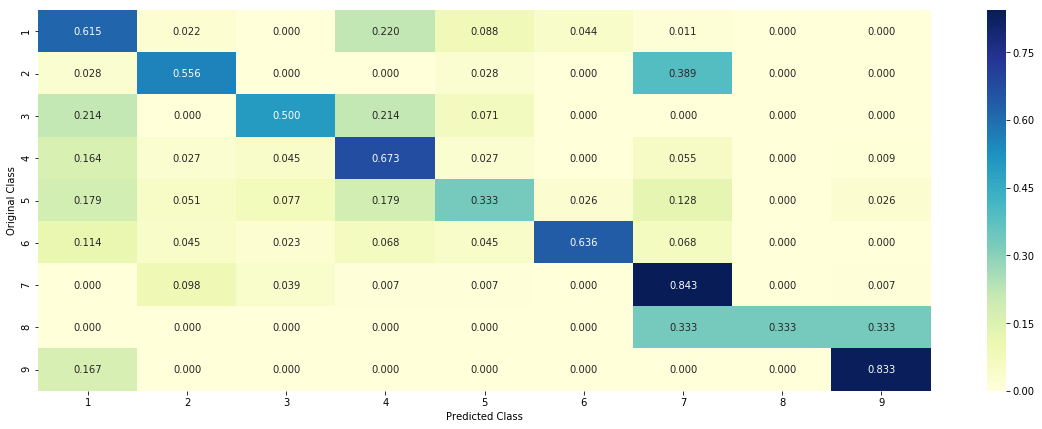

In [130]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

### Applying this Feature Engineering it gave us better results , since we were able to minimise the log-loss<1.

# Feature Engineering 2

## 6. Select 10k best features using Decision Tree feature_importances_ , discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression,Linear SVM)

### 6.1 Vectorizing Text Data

In [203]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_features = 20000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()




print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 20000


In [204]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

### Stacking the  features

In [205]:
train_x_onehotCoding = hstack((word_count_standardized_train_data,char_count_standardized_train_data,Word_Density_standardized_train_data,
stopword_count_standardized_train_data,topword_count_standardized_train_data,leastword_count_standardized_train_data,
 train_gene_feature_onehotCoding,train_variation_feature_onehotCoding,train_text_onehotCoding,train_text_feature_onehotCoding
 )).tocsr()
train_y = np.array(list(train_df['Class']))

In [206]:
test_x_onehotCoding = hstack((word_count_standardized_test_data,
char_count_standardized_test_data,
Word_Density_standardized_test_data,
stopword_count_standardized_test_data, 
topword_count_standardized_test_data,
leastword_count_standardized_test_data,
test_gene_feature_onehotCoding, test_variation_feature_onehotCoding, test_text_onehotCoding,test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

In [207]:
cv_x_onehotCoding = hstack((word_count_standardized_cv_data,
char_count_standardized_cv_data,
Word_Density_standardized_cv_data,
stopword_count_standardized_cv_data,
topword_count_standardized_cv_data,
leastword_count_standardized_cv_data,
cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding, cv_text_onehotCoding,cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [208]:
#creating a list with all feature names
features_names = []
features_names.append("Word count")
features_names.append("Char count")
features_names.append("Word density")
features_names.append("Stopword count")
features_names.append("Top word count")
features_names.append("Least  word count")


for a in gene_features :
    features_names.append(a)

for a in variation_features  :
    features_names.append(a)

for a in gene_variation_features :
    features_names.append(a)

for a in train_text_features :
    features_names.append(a)

In [209]:
print("Total number of Features :", len(features_names))

Total number of Features : 25435


1. A trained DecisionTreeClassifier model automatically calculates feature importance on your predictive modeling problem.These
importance scores are available in the featureimportances member variable of the trained model.

2.  Feature importance scores can be used for feature selection in scikit-learn.

In [210]:
train_x_onehotCoding

<2124x25435 sparse matrix of type '<class 'numpy.float64'>'
	with 6579818 stored elements in Compressed Sparse Row format>

In [211]:
tfidf_df = pd.DataFrame(train_x_onehotCoding.toarray(), columns=features_names)

In [212]:
tfidf_df_test = pd.DataFrame(test_x_onehotCoding.toarray(), columns=features_names)

In [213]:
tfidf_df_cv = pd.DataFrame(cv_x_onehotCoding.toarray(), columns=features_names)

In [214]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(tfidf_df,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Creating a dictionary with all the feature names and their corresponding feature importance scores

In [215]:
#https://datascience.stackexchange.com/questions/31406/tree-decisiontree-feature-importances-numbers-correspond-to-how-features
feature_imp_dict = dict(zip(features_names, clf.feature_importances_))

#### Sorting dictionary in descending order and selecting top 5000 features names

In [216]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sorted_cat_dict = dict(sorted(feature_imp_dict.items(), key=lambda kv: kv[1],reverse=True)[:10000])
#dict(sorted(data.items(), key=lambda x: x[1]['score'], reverse=True)[:2])

#### Get top n key's with Value as dictionary return dictionary keys as a list in Python

In [217]:
important_feature=[]
for key in sorted_cat_dict.keys():
    important_feature.append(key)

In [218]:
len(important_feature)

10000

#### Selecting multiple columns in a pandas dataframe

In [219]:
tfidf_df_imp=tfidf_df.loc[:, important_feature]

In [220]:
tfidf_df_imp.shape

(2124, 11124)

In [221]:
# I have accidentally create a duplicate column with the same name. Remove duplicate columns like so:
tfidf_df_imp = tfidf_df_imp.loc[:,~tfidf_df_imp.columns.duplicated()]

In [222]:
tfidf_df_imp.shape

(2124, 10000)

This is our Final Data Frame with Top 5000 Features Selected using feature_importances_

In [223]:
tfidf_df_imp_test=tfidf_df_test.loc[:, important_feature]
tfidf_df_imp_test = tfidf_df_imp_test.loc[:,~tfidf_df_imp_test.columns.duplicated()]

In [224]:
tfidf_df_imp_cv=tfidf_df_cv.loc[:, important_feature]
tfidf_df_imp_cv = tfidf_df_imp_cv.loc[:,~tfidf_df_imp_cv.columns.duplicated()]

### 6.2 Visual Analysis

In [225]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(tfidf_df,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

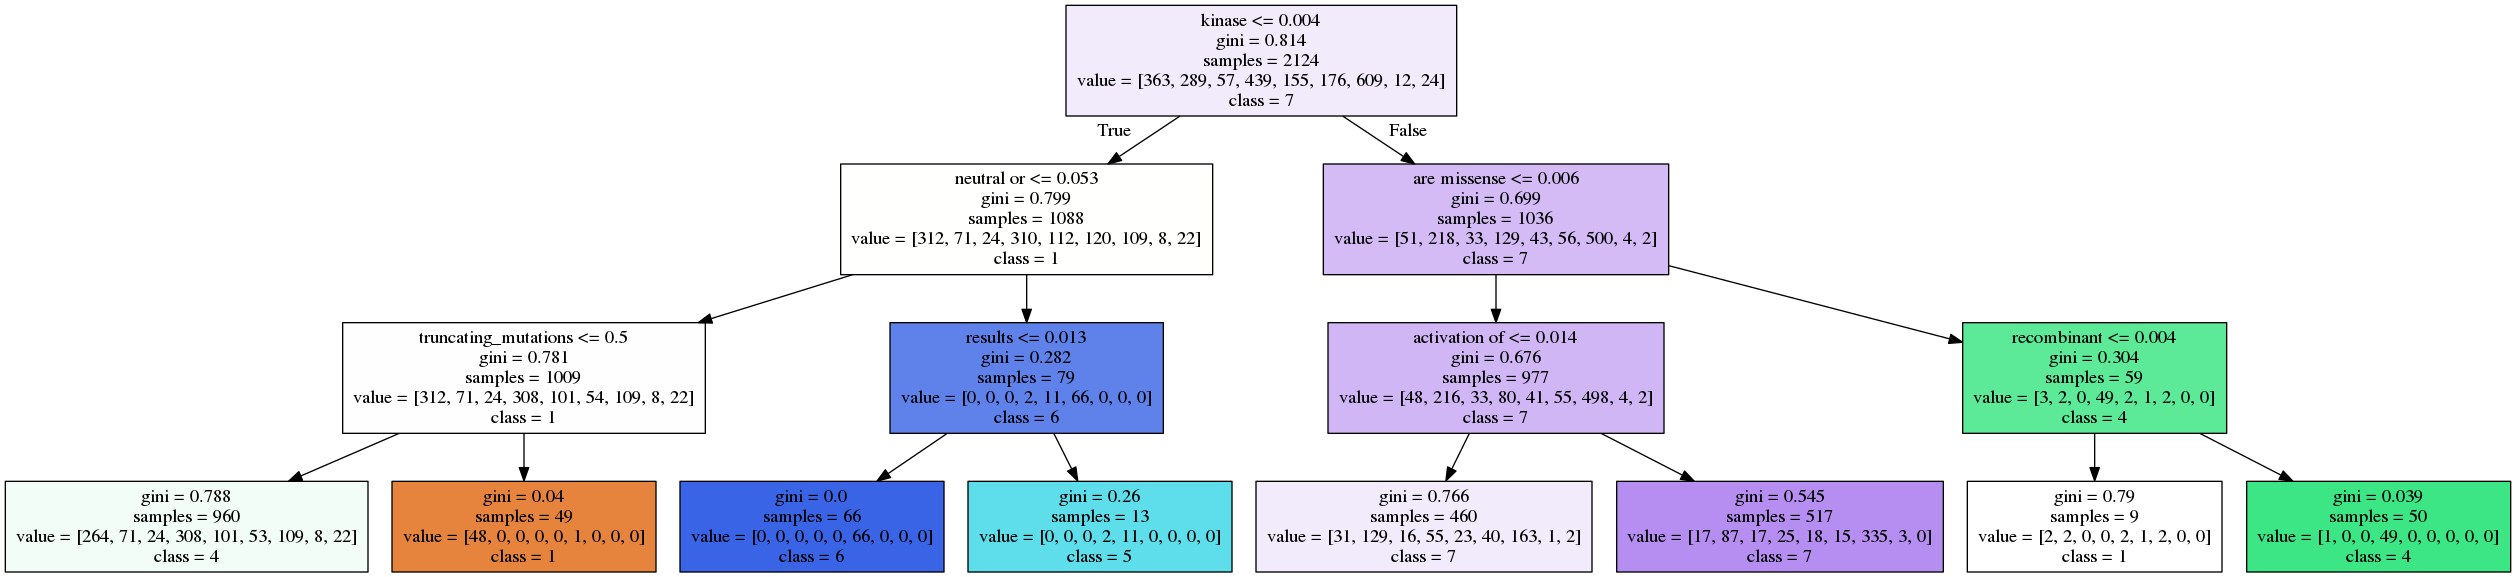

In [229]:
##https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(model, out_file=None
, feature_names=features_names, class_names=['1', '2', '3','4','5','6','7','8','9']
, filled = True))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)
from IPython.display import Image
Image(png_bytes)
#display(SVG(graph.pipe(format='svg')))

### 6.3 Logistic Regression with Class Balancing

#### 6.3.1 Hyper parameter tuning

for alpha = 1e-06
Log Loss : 1.0939076702383073
for alpha = 1e-05
Log Loss : 1.0870339474784358
for alpha = 0.0001
Log Loss : 1.0082593453097404
for alpha = 0.001
Log Loss : 0.9937983511141402
for alpha = 0.01
Log Loss : 1.0889112633253355
for alpha = 0.1
Log Loss : 1.1665455049567612
for alpha = 1
Log Loss : 1.3985378514371853
for alpha = 10
Log Loss : 1.751515715088816
for alpha = 100
Log Loss : 1.834094607072902


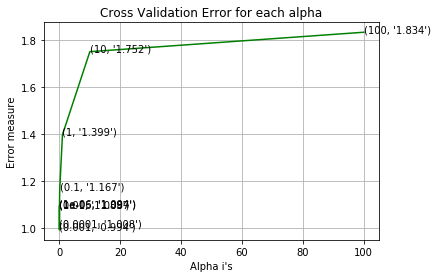

For values of best alpha =  0.001 The train log loss is: 0.638427803750107
For values of best alpha =  0.001 The cross validation log loss is: 0.9937983511141402
For values of best alpha =  0.001 The test log loss is: 0.9935514701326951


In [227]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.




# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(tfidf_df_imp, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tfidf_df_imp, train_y)
    sig_clf_probs = sig_clf.predict_proba(tfidf_df_imp_cv)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(tfidf_df_imp, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tfidf_df_imp, train_y)

predict_y = sig_clf.predict_proba(tfidf_df_imp)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(tfidf_df_imp_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(tfidf_df_imp_test )
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### 6.3.2  Testing the model with best hyper paramters

Log loss : 0.9937983511141402
Number of mis-classified points : 0.34962406015037595
-------------------- Confusion matrix --------------------


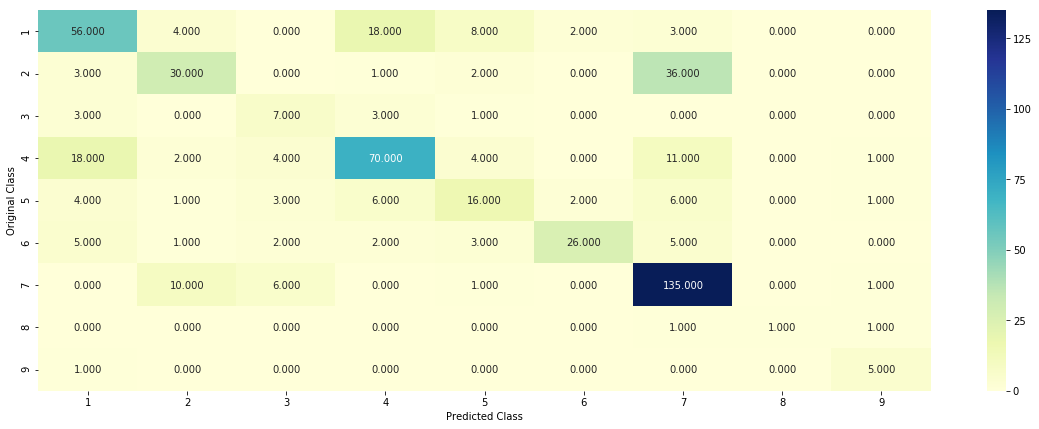

-------------------- Precision matrix (Columm Sum=1) --------------------


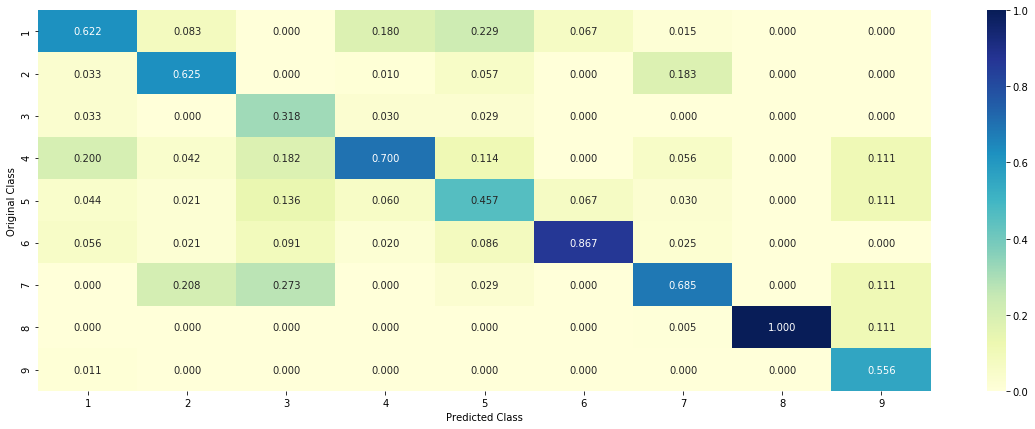

-------------------- Recall matrix (Row sum=1) --------------------


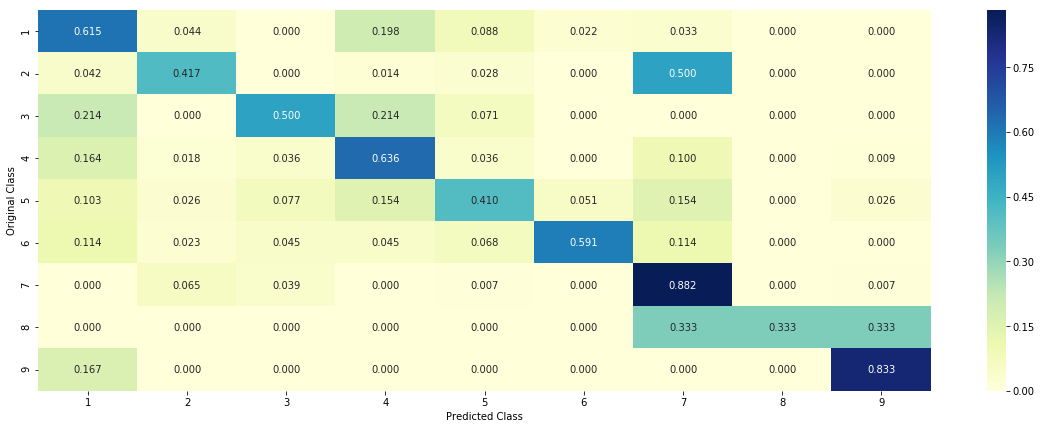

In [228]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(tfidf_df_imp, train_y, tfidf_df_imp_cv, cv_y, clf)

This was bad than Feature Engineering-1

## Using these Feature Engineering we got log_loss<1.

### Summarising using a PRETTY TABLE


In [2]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = "*** Model Summary *** [Performance Metric: Log-Loss]"
ptable.field_names=["Model Name","Train","CV","Test","% Misclassified Points"]
ptable.add_row(["Naive Bayes","0.87","1.25","1.25","35"])
ptable.add_row(["KNN","0.51","1.06","1.07","38"])
ptable.add_row(["Logistic Regression With Class balancing","0.54","1.03","1.05","34"])
ptable.add_row(["Logistic Regression Without Class balancing","0.50","1.08","1.08","36"])
ptable.add_row(["Linear SVM","0.55","1.10","1.10","36"])
ptable.add_row(["Random Forest Classifier With One hot Encoding","0.64","1.14","1.14","39"])
ptable.add_row(["Random Forest Classifier With Response Coding","0.05","1.35","1.25","49"])
ptable.add_row(["Stack Models:LR+NB+SVM","0.60","1.12","1.08","35"])
ptable.add_row(["Maximum Voting classifier","0.82","1.13","1.13","36"])

ptable.add_row(["LR with Class Balancing (TFIDF TOP 1000)","0.42","0.99","0.96","36"])
ptable.add_row(["LR with Class Balancing (BOW UNIgram and BIgram)","0.70","1.19","1.15","39"])
ptable.add_row(["LR with Class Balancing (Feature Engineering-1)","0.54","0.90","0.99","30"])
ptable.add_row(["LR with Class Balancing (Feature Engineering-2)","0.52","0.91","0.92","33"])
ptable.add_row(["LR with Class Balancing (Feature Engineering-3)","0.63","0.99","0.99","34"])
print(ptable)
print()

+--------------------------------------------------+-------+------+------+------------------------+
|                    Model Name                    | Train |  CV  | Test | % Misclassified Points |
+--------------------------------------------------+-------+------+------+------------------------+
|                   Naive Bayes                    |  0.87 | 1.25 | 1.25 |           35           |
|                       KNN                        |  0.51 | 1.06 | 1.07 |           38           |
|     Logistic Regression With Class balancing     |  0.54 | 1.03 | 1.05 |           34           |
|   Logistic Regression Without Class balancing    |  0.50 | 1.08 | 1.08 |           36           |
|                    Linear SVM                    |  0.55 | 1.10 | 1.10 |           36           |
|  Random Forest Classifier With One hot Encoding  |  0.64 | 1.14 | 1.14 |           39           |
|  Random Forest Classifier With Response Coding   |  0.05 | 1.35 | 1.25 |           49           |
